In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv


In [2]:
# Load Dataset
df = pd.read_csv("/kaggle/input/netflix-reviews-playstore-daily-updated/netflix_reviews.csv")
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,8e34c46f-600a-49db-aa99-5ebc64c0513c,Adrian Delrio,I can watch a lot of movies,5,0,8.116.0 build 8 50690,2024-05-29 21:55:09,8.116.0 build 8 50690
1,011d817a-c12b-48e7-a686-d5a7b16193e2,charif haidar,They make you pay for a membership then they t...,1,0,8.116.0 build 8 50690,2024-05-29 21:54:40,8.116.0 build 8 50690
2,07c4146a-0c30-4c6c-b8ac-5194b0fdaf92,Kaycee Kingsley,Good,5,0,8.28.0 build 4 40234,2024-05-29 21:38:20,8.28.0 build 4 40234
3,38da9275-be72-403b-b2f4-d998656fd4e8,Shaik Tabrez,I really enjoy Netflix. But why is Netflix con...,3,0,8.116.0 build 8 50690,2024-05-29 21:18:29,8.116.0 build 8 50690
4,926cb80a-f22d-49d2-87b3-8d81736c2102,Maurisha Harris,The app doesn't want to update,1,0,8.116.0 build 8 50690,2024-05-29 21:03:10,8.116.0 build 8 50690


In [3]:
# Checking the size of the dataset
df.shape

(111155, 8)

In [4]:
df.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Star value counts

stars = df['score'].value_counts().sort_index()
stars

score
1    43525
2    10643
3    11817
4    13729
5    31441
Name: count, dtype: int64

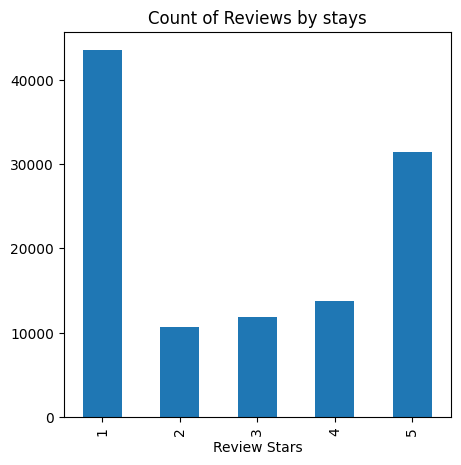

<Axes: title={'center': 'Count of Reviews by stays'}, xlabel='Review Stars'>

In [7]:
star_plot = df['score'].value_counts().sort_index().plot(kind= 'bar', title= 'Count of Reviews by stays', figsize= (5, 5))
star_plot.set_xlabel('Review Stars')
plt.show()
star_plot

In [8]:
import re

def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # remove emoji 
        "\U0001F300-\U0001F5FF" # emoji code here:https://unicode.org/emoji/charts/full-emoji-list.html 
        "\U0001F680-\U0001F6FF"   
        "\U0001F1E0-\U0001F1FF"  
        "\U00002500-\U00002BEF" 
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"
        "\u3030"
        "]+", flags=re.UNICODE
        
    )
    text = emoji_pattern.sub(r'', text)
    return text

# Apply Function
df['cleaned_content'] = df['content'].astype(str).apply(preprocess_text)

In [9]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content
0,8e34c46f-600a-49db-aa99-5ebc64c0513c,Adrian Delrio,I can watch a lot of movies,5,0,8.116.0 build 8 50690,2024-05-29 21:55:09,8.116.0 build 8 50690,i can watch a lot of movies
1,011d817a-c12b-48e7-a686-d5a7b16193e2,charif haidar,They make you pay for a membership then they t...,1,0,8.116.0 build 8 50690,2024-05-29 21:54:40,8.116.0 build 8 50690,they make you pay for a membership then they t...
2,07c4146a-0c30-4c6c-b8ac-5194b0fdaf92,Kaycee Kingsley,Good,5,0,8.28.0 build 4 40234,2024-05-29 21:38:20,8.28.0 build 4 40234,good
3,38da9275-be72-403b-b2f4-d998656fd4e8,Shaik Tabrez,I really enjoy Netflix. But why is Netflix con...,3,0,8.116.0 build 8 50690,2024-05-29 21:18:29,8.116.0 build 8 50690,i really enjoy netflix but why is netflix conf...
4,926cb80a-f22d-49d2-87b3-8d81736c2102,Maurisha Harris,The app doesn't want to update,1,0,8.116.0 build 8 50690,2024-05-29 21:03:10,8.116.0 build 8 50690,the app doesnt want to update


In [10]:
# Define a function to map star ratings to sentiment categories
def sentiment(stars):
    if stars <= 2:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    else:
        return 'positive'

# Create a new column 'sentiment' using the apply function
df['sentiment'] = df['score'].apply(sentiment)


In [11]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content,sentiment
0,8e34c46f-600a-49db-aa99-5ebc64c0513c,Adrian Delrio,I can watch a lot of movies,5,0,8.116.0 build 8 50690,2024-05-29 21:55:09,8.116.0 build 8 50690,i can watch a lot of movies,positive
1,011d817a-c12b-48e7-a686-d5a7b16193e2,charif haidar,They make you pay for a membership then they t...,1,0,8.116.0 build 8 50690,2024-05-29 21:54:40,8.116.0 build 8 50690,they make you pay for a membership then they t...,negative
2,07c4146a-0c30-4c6c-b8ac-5194b0fdaf92,Kaycee Kingsley,Good,5,0,8.28.0 build 4 40234,2024-05-29 21:38:20,8.28.0 build 4 40234,good,positive
3,38da9275-be72-403b-b2f4-d998656fd4e8,Shaik Tabrez,I really enjoy Netflix. But why is Netflix con...,3,0,8.116.0 build 8 50690,2024-05-29 21:18:29,8.116.0 build 8 50690,i really enjoy netflix but why is netflix conf...,neutral
4,926cb80a-f22d-49d2-87b3-8d81736c2102,Maurisha Harris,The app doesn't want to update,1,0,8.116.0 build 8 50690,2024-05-29 21:03:10,8.116.0 build 8 50690,the app doesnt want to update,negative


In [12]:
# Shuffle the DataFrame rows
small_dataset = df.sample(10000, random_state=42)  # Sample 10000 rows direct
small_dataset.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content,sentiment
88565,f8a7add3-1fb8-414c-9784-6490dd8ca55a,A Google user,alway has errors and wont connect to the show ...,1,0,6.20.1 build 51 31579,2019-01-03 23:34:49,6.20.1 build 51 31579,alway has errors and wont connect to the show ...,negative
88440,063b314e-7014-4c85-b41f-f90826276447,A Google user,it's good but it says another phone is using i...,5,0,5.16.1 build 26734,2019-05-18 21:37:34,5.16.1 build 26734,its good but it says another phone is using it...,positive
60549,26d7cfd4-a540-48d3-98be-e2b792037bd9,Gonsalves,"No kannada option... So , no kannada, no busin...",1,0,8.104.0 build 5 50619,2024-03-18 14:46:41,8.104.0 build 5 50619,no kannada option so no kannada no business,negative
46272,66530d7f-9a1b-4389-82e3-334674bd5350,A Google user,almost perfect app only problem is you want to...,4,0,7.23.0 build 12 34429,2019-11-01 00:58:18,7.23.0 build 12 34429,almost perfect app only problem is you want to...,positive
963,77867ccf-bda7-49f1-a79b-b6d3db594337,Ayaan Lean,What a app,5,0,NaN,2024-05-24 18:09:20,NaN,what a app,positive


In [13]:
# Check for missing values in column 'A'
missing_values_in_content = small_dataset['cleaned_content'].isnull().sum()
missing_values_in_content

0

In [14]:
X = list(small_dataset['cleaned_content'])

In [15]:
# Convert sentiments to numerical labels
sentiment_label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
y = list(small_dataset['sentiment'].map(sentiment_label_map).values)

In [16]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [17]:
y[:5]

[0, 2, 0, 2, 2]

In [18]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [19]:
# Convert to Hugging Face datasets format
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=512)

In [20]:
import torch
from torch.utils.data import DataLoader
from datasets import load_dataset

# Create a custom dataset class
class NetflixDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [21]:
train_dataset = NetflixDataset(train_encodings, y_train)
val_dataset = NetflixDataset(val_encodings, y_test)

In [22]:
import os
# Create a directory named 'results'
results_dir = os.mkdir('results')
logs_dir = os.mkdir('logs')

def get_dir_paths(cwd):
    """Gets all directory paths recursively within a given directory.

    Args:
        cwd: The current working directory path.

    Returns:
        A list of all directory paths found recursively.
    """
    all_paths = []
    for dirpath, dirnames, _ in os.walk(cwd):
        all_paths.append(dirpath)
    for dirname in dirnames:
        all_paths.extend(get_dir_paths(os.path.join(dirpath, dirname)))
    return all_paths

# Get the current working directory
cwd = os.getcwd()

# Get all directory paths recursively
all_dir_paths = get_dir_paths(cwd)

# Print all directory paths
for path in all_dir_paths:
    print(path)

/kaggle/working
/kaggle/working/results
/kaggle/working/.virtual_documents
/kaggle/working/logs


In [23]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='/kaggle/working/results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='/kaggle/working/logs',            # directory for storing logs
    logging_steps=10,
)

2024-05-31 21:51:26.937439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 21:51:26.937616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 21:51:27.079592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
pip install evaluate


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [27]:

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-cased", num_labels=3)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics      # evaluation dataset
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Step,Training Loss
10,1.005000
20,0.960600
30,0.991300
40,0.958100
50,0.954000
60,0.946700
70,0.970300
80,0.852600
90,0.896800
100,0.974900


TrainOutput(global_step=2000, training_loss=0.5827567495107651, metrics={'train_runtime': 478.3034, 'train_samples_per_second': 33.452, 'train_steps_per_second': 4.181, 'total_flos': 2129574224736000.0, 'train_loss': 0.5827567495107651, 'epoch': 2.0})

In [31]:
trainer.evaluate(val_dataset)

{'eval_loss': 0.5881345272064209,
 'eval_accuracy': 0.7925,
 'eval_runtime': 13.2802,
 'eval_samples_per_second': 150.6,
 'eval_steps_per_second': 9.412,
 'epoch': 2.0}

In [37]:
# Save model
trainer.save_model("/kaggle/working/model")